In [6]:
import time
from datetime import datetime
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import numpy as np

url = 'https://www.twse.com.tw/zh/trading/historical/stock-day.html'

In [7]:
import pytest
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

In [42]:
def job(stock_code):
    driver = webdriver.Chrome(executable_path='./chromedriver')
    driver.get(url=url)
    driver.find_element("xpath", '//*[@id="label1"]').send_keys(stock_code)
    
    stock_dict = {
        '日期': [],
        '成交股數': [],
        '成交金額': [],
        '開盤價': [],
        '最高價': [],
        '最低價': [],
        '收盤價': [],
        '漲跌價差': [],
        '成交筆數': []
    }
    
    with tqdm( total = 14*12 - 5,  position=0, leave=True) as pbar:
        for i in range(2010,2024):
            for j in range(1,13):
                if i == 2023 and j == 8:
                    break
                select_element_year = driver.find_element(By.NAME, 'yy')
                select_year = Select(select_element_year)
                select_year.select_by_value(str(i))

                select_element_month = driver.find_element(By.NAME, 'mm')
                select_month = Select(select_element_month)
                select_month.select_by_value(str(j))

                driver.find_element("xpath", '//*[@id="form"]/div/div[1]/div[3]/button').click()
                time.sleep(2.5)

                html_source = driver.page_source
                soup = BeautifulSoup(html_source, 'lxml')
                if soup.select_one('tbody') == None:
                    continue
                for tr in soup.select_one('tbody').select('tr'):
                    stock_dict['日期'].append(tr.select('td')[0].text.strip())
                    stock_dict['成交股數'].append(tr.select('td')[1].text.strip())
                    stock_dict['成交金額'].append(tr.select('td')[2].text.strip())
                    stock_dict['開盤價'].append(tr.select('td')[3].text.strip())
                    stock_dict['最高價'].append(tr.select('td')[4].text.strip())
                    stock_dict['最低價'].append(tr.select('td')[5].text.strip())
                    stock_dict['收盤價'].append(tr.select('td')[6].text.strip())
                    stock_dict['漲跌價差'].append(tr.select('td')[7].text.strip())
                    stock_dict['成交筆數'].append(tr.select('td')[8].text.strip())

                df = pd.DataFrame(stock_dict)

                pbar.update(1)
                
    date = datetime.today().strftime("%Y%m%d")
    file_name = '{0}_{1}股票資訊.csv'.format(date,stock_code)
    df.to_csv(file_name, encoding='utf_8_sig')
    
    driver.close()

In [37]:
import threading

stock_list = ['2454','2330','6214','2308','2357','2353']
threads = []
for idx, stock_code in enumerate(stock_list):
  threads.append(threading.Thread(target = job, args = (idx, stock_code)))
  threads[-1].start()


C:\Users\Tina\AppData\Local\Temp\ipykernel_26568\821565475.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='./chromedriver')



  0%|                                                                                          | 0/163 [00:00<?, ?it/s]




  0%|                                                                                          | 0/163 [00:00<?, ?it/s]



  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

  0%|                                                                                          | 0/163 [00:00<?, ?it/s]


  1%|▌                                                                                 | 1/163 [00:02<07:37,  2.82s/it]




  1%|▌                                                                                 | 1/163 [00:02<07:37,  2.83s/it]



  1%|▌                                      

 17%|█████████████▉                                                                   | 28/163 [01:13<05:52,  2.61s/it]




 16%|████████████▉                                                                    | 26/163 [01:14<06:12,  2.72s/it]

 10%|███████▉                                                                         | 16/163 [01:14<06:42,  2.74s/it]



 15%|███████████▉                                                                     | 24/163 [01:15<06:03,  2.61s/it]


 18%|██████████████▍                                                                  | 29/163 [01:16<05:50,  2.61s/it]




 17%|█████████████▍                                                                   | 27/163 [01:17<06:11,  2.73s/it]

 10%|████████▍                                                                        | 17/163 [01:17<06:40,  2.74s/it]



 15%|████████████▍                                                                    | 25/163 [01:17<06:00,  2.61s/it]


 18%|██████████████▉

 33%|██████████████████████████▎                                                      | 53/163 [02:19<04:47,  2.61s/it]



 29%|███████████████████████▊                                                         | 48/163 [02:19<05:05,  2.66s/it]




 33%|██████████████████████████▎                                                      | 53/163 [02:19<04:49,  2.63s/it]

 31%|█████████████████████████▎                                                       | 51/163 [02:21<04:59,  2.67s/it]




In [46]:

import threading

# AI
# stock_list = ['2454','2330','6214','2308','2357','2353']

# Computer
# stock_list = ['2377', '2324', '2356', '2376', '3231', '8215']

# weaving
stock_list = ['1414', '1434', '1451', '1457', '1476', '1477'] 

threads = []
for stock_code in stock_list:
  threads.append(threading.Thread(target = job, args = (stock_code, )))
  threads[-1].start()

C:\Users\Tina\AppData\Local\Temp\ipykernel_26568\3058508696.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='./chromedriver')
 97%|█████████████████████████████████████████████████████████████████████████████▌  | 158/163 [07:20<00:13,  2.79s/it]


In [61]:
# Stock list is a two dimensional list
# The first order is category, i.e AI/Computer/Weaving
# The second order is sample, i.e. first stock of AI, ...

category = 3
sample = 6
stock_list = []
# AI
stock_list.append(['2330','2330','6214','2308','2357','2353'])
# stock_list.append(['2454','2330','6214','2308','2357','2353'])

# Computer
stock_list.append(['2377', '2324', '2356', '2376', '3231', '8215'])
# stock_list.append(['2377', '2324', '2356', '2376', '3231', '8215'])

# Weaving
stock_list.append(['1414', '1434', '1451', '1457', '1476', '1477'])

df_list = []

# Read all stock information
for i in range(category):
    for j in range(sample):
        tmp = pd.read_csv('20230716_{}股票資訊.csv'.format(stock_list[i][j])).replace('X0.00', 0)
        tmp = tmp.replace(r'\D+', '', regex=True)
        df_list.append(tmp[tmp['成交股數'] != 0])

df_joint_date = pd.merge(df_list[0]['日期'], df_list[1]['日期'], on=['日期'], how='inner').drop_duplicates(subset=['日期'])
for i in range(2, category * sample):
    df_joint_date = pd.merge(df_joint_date, df_list[i]['日期'], on=['日期'], how='inner').drop_duplicates(subset=['日期'])
#     print(df_joint_date.shape)

# Perform the datetime injection to all stock
x_values, y_values = [], []
for i in range(category):
    for j in range(sample):
        index = i*sample +ｊ
        df_list[index]['成交金額'] = df_list[index]['成交金額'].astype(float)   
        df_list[index] = pd.merge(df_list[index], df_joint_date, on=['日期'], how='inner').drop_duplicates(subset=['日期'])
        x_values.extend(df_list[i].values[:, 2:])
        y_values.extend([i for k in range(df_joint_date.shape[0])])
x_values = np.array(x_values)
y_values = np.array(y_values)
# print(df_joint_date.shape)
# for i in range(category * sample):
#     print(df_list[i].shape)

In [ ]:
https://blog.csdn.net/duanlianvip/article/details/100973811

In [62]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.cluster import KMeans

x_scaled = preprocessing.normalize(x_values)
# x_scaled, y_values = shuffle(x_scaled, y_values, random_state=0)
pca = PCA(n_components=3)

x_pca = pca.fit_transform(x_scaled)

x_pca_frame = pd.DataFrame(x_pca, columns=['pca_1', 'pca_2', 'pca_3'])
x_pca_frame.head()

,pca_1,pca_2,pca_3
0,0.003754,-0.000038,-5.627788e-06
1,0.003582,-0.000037,-5.938412e-06
2,-0.008718,0.000044,5.894481e-07
3,-0.008731,0.000044,6.011855e-07
4,-0.008730,0.000044,6.103773e-07


In [10]:
from sklearn.cluster import KMeans

est = KMeans(n_clusters=3, n_init=100, init='k-means++',max_iter=100000, verbose=0, random_state=87)

est.fit(x_pca)

KMeans(max_iter=100000, n_clusters=3, n_init=100, random_state=87)

In [11]:
print(y_values.shape)
y_values_true_answer = pd.DataFrame(y_values.reshape(-1, 1), columns=['answer'])
kmeans_clustering_labels = pd.DataFrame(est.labels_, columns=['cluster'])

x_pca_frame_final = pd.concat([x_pca_frame, kmeans_clustering_labels], axis=1)
x_pca_frame_final = pd.concat([x_pca_frame_final, y_values_true_answer], axis=1)
print(x_pca_frame_final.head())
x_pca_frame_final.to_csv('stock.csv', encoding='utf_8_sig')

(30114,)
      pca_1     pca_2         pca_3  cluster  answer
0  0.022082  0.000125 -7.693313e-06        2       2
1 -0.007071  0.000025 -3.752469e-08        0       1
2  0.005054 -0.000037 -2.238999e-06        1       2
3 -0.003489 -0.000009 -1.560596e-06        0       0
4  0.001880 -0.000035 -4.041757e-06        1       0


calinski_harabaz_score with k = 3 is 98081.4898083657


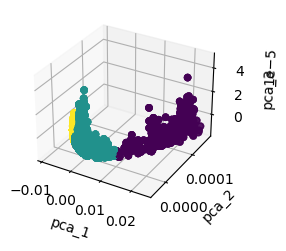

In [14]:
import matplotlib.pylab as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

d = {}
fig_reduced_data = plt.figure(figsize=(12,12))
for k in range(3,4):
    est = KMeans(n_clusters=k, random_state=111)
    y_pred = est.fit_predict(x_pca)
    calinski_harabaz_score = metrics.calinski_harabasz_score(x_pca_frame, y_pred)
    d.update({k: calinski_harabaz_score})
    print('calinski_harabaz_score with k = {0} is {1}'.format(k, calinski_harabaz_score))
    
    ax = plt.subplot(4,3,k-1,projection='3d')
    ax.scatter(x_pca_frame.pca_1,x_pca_frame.pca_2,x_pca_frame.pca_3, c=y_pred)
    ax.set_xlabel('pca_1')
    ax.set_ylabel('pca_2')
    ax.set_zlabel('pca_3')

[0 2 1 ... 2 2 2]
Counter({2: 14154, 1: 13542, 0: 2418})


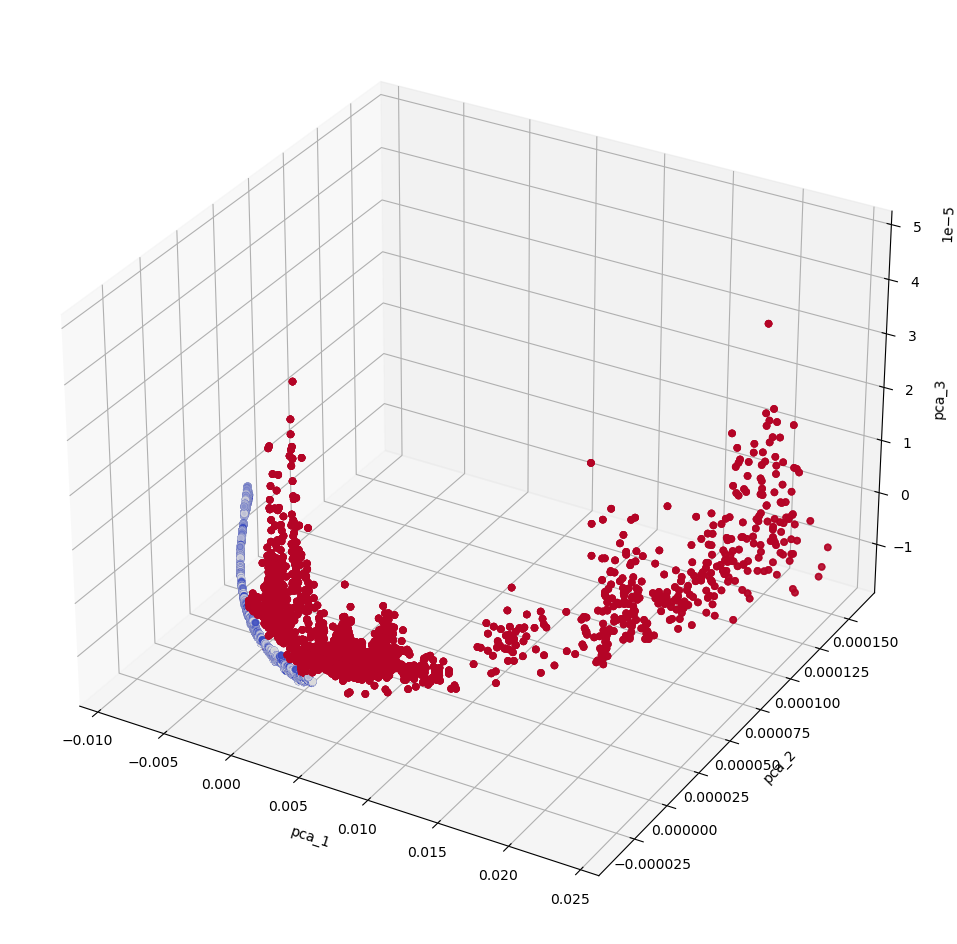

In [40]:
fig_reduced_data = plt.figure(figsize=(12,12))
ax = plt.subplot(1,1,1,projection='3d')
ax.scatter(x_pca_frame.pca_1,x_pca_frame.pca_2,x_pca_frame.pca_3, c=(y_values+100), cmap='coolwarm')
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('pca_3')

print(y_pred)
import collections
counter = collections.Counter(y_pred)
print(counter)

# Two dimension case

In [63]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.cluster import KMeans

x_scaled = preprocessing.normalize(x_values)
# x_scaled, y_values = shuffle(x_scaled, y_values, random_state=0)
pca = PCA(n_components=2)

x_pca = pca.fit_transform(x_scaled)

x_pca_frame = pd.DataFrame(x_pca, columns=['pca_1', 'pca_2'])
x_pca_frame.head()

,pca_1,pca_2
0,0.003754,-0.000038
1,0.003582,-0.000037
2,-0.008718,0.000044
3,-0.008731,0.000044
4,-0.008730,0.000044


calinski_harabaz_score with k = 3 is 98081.76746764002
0 10038
10038 20076
20076 30114


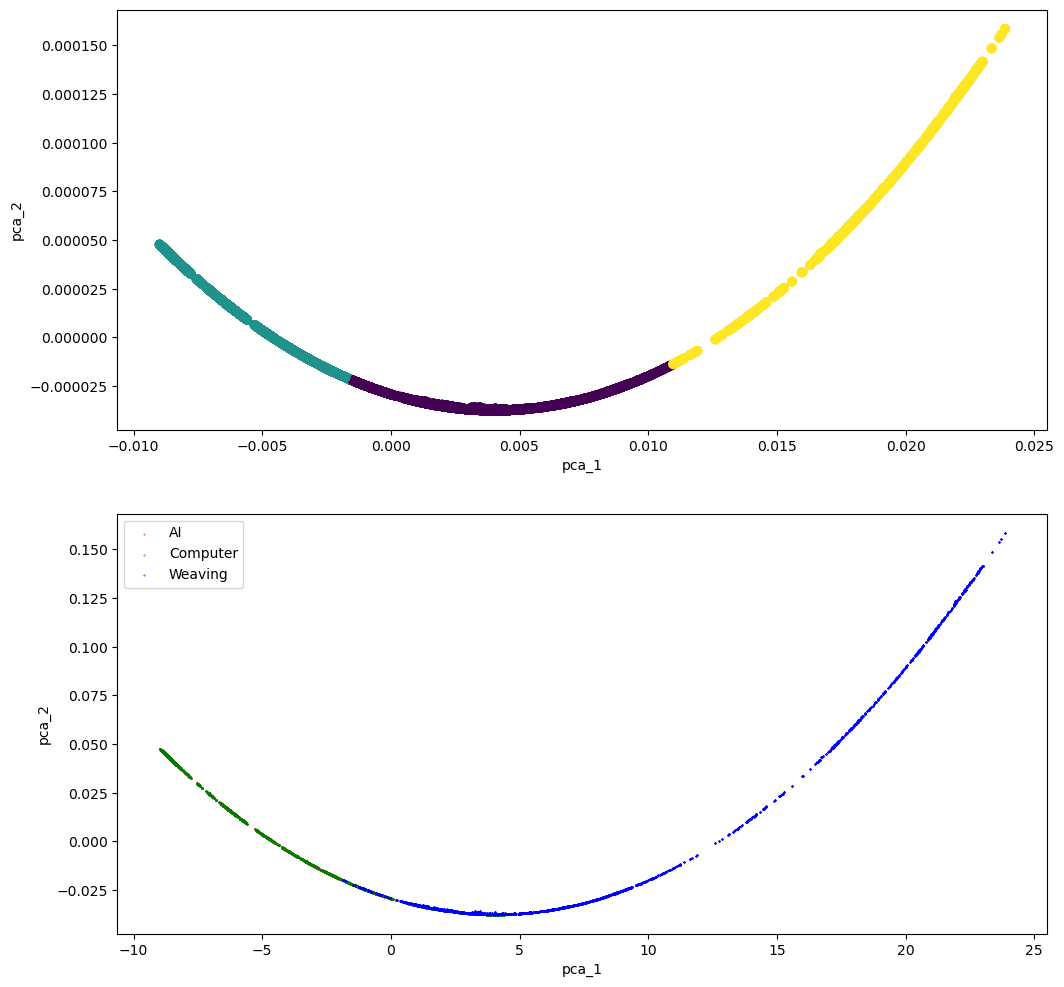

In [78]:
import matplotlib.pylab as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

d = {}
fig_reduced_data = plt.figure(figsize=(12,12))

k = 3
est = KMeans(n_clusters=k, n_init=100, init='k-means++',max_iter=100000, verbose=0, random_state=42)

y_pred = est.fit_predict(x_pca)
calinski_harabaz_score = metrics.calinski_harabasz_score(x_pca_frame, y_pred)
d.update({k: calinski_harabaz_score})
print('calinski_harabaz_score with k = {0} is {1}'.format(k, calinski_harabaz_score))

ax = plt.subplot(2,1,1)
ax.scatter(x_pca_frame.pca_1,x_pca_frame.pca_2, c=y_pred, label=y_values)
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')

ax2 = plt.subplot(2,1,2)

cnt = y_values.shape[0] // 3
label = ['AI', 'Computer', 'Weaving']
color = ['r', 'g', 'b']
for i in range(3):
    print(cnt*i, (cnt*(i+1)))
    ax2.scatter(x_pca_frame.pca_1[cnt*i : (cnt*(i+1))] * 1000,x_pca_frame.pca_2[cnt*i : (cnt*(i+1))] * 1000, c=color[i], label=label[i], s=0.1)
    ax2.set_xlabel('pca_1')
    ax2.set_ylabel('pca_2')
    ax2.legend(loc='best')    



# TSNE

In [97]:
# 建立tsne轉換器
import seaborn as sns
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=42,perplexity=30, verbose=1,n_jobs=10) # 困惑度慎選
x_tsne = tsne.fit_transform(x_values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30114 samples in 0.043s...
[t-SNE] Computed neighbors for 30114 samples in 0.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30114
[t-SNE] Computed conditional probabilities for sample 2000 / 30114
[t-SNE] Computed conditional probabilities for sample 3000 / 30114
[t-SNE] Computed conditional probabilities for sample 4000 / 30114
[t-SNE] Computed conditional probabilities for sample 5000 / 30114
[t-SNE] Computed conditional probabilities for sample 6000 / 30114
[t-SNE] Computed conditional probabilities for sample 7000 / 30114
[t-SNE] Computed conditional probabilities for sample 8000 / 30114
[t-SNE] Computed conditional probabilities for sample 9000 / 30114
[t-SNE] Computed conditional probabilities for sample 10000 / 30114
[t-SNE] Computed conditional probabilities for sample 11000 / 30114
[t-SNE] Computed conditional probabilities for sample 12000 / 30114
[t-SNE] Computed conditional probabilities for sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: -48.022865
[t-SNE] KL divergence after 1000 iterations: -7.077259


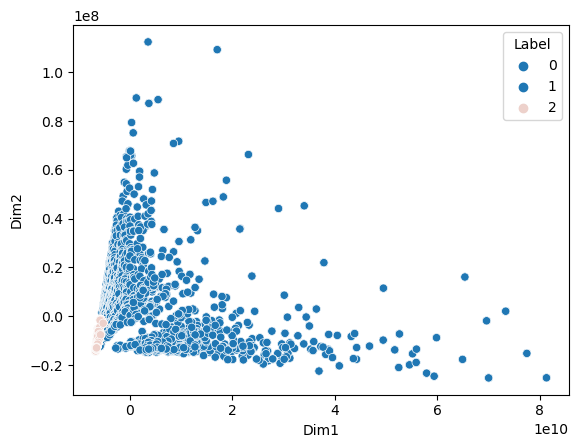

In [102]:
color=['r', 'g', 'b']
sns.color_palette("tab10")
for i in range(3):
    df_tsne = pd.DataFrame({
        "Dim1":x_tsne[10038*i:10038*(i+1),0],
        "Dim2":x_tsne[10038*i:10038*(i+1),1],
        "Label": y_values[10038*i:10038*(i+1)]
    })# 重建DataFrame
    ax = sns.scatterplot(x="Dim1", y="Dim2", hue="Label",
                      data=df_tsne, color=color[i])# 繪圖

# 奇異值分解SVD(singular value decomposition)

In [103]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3)
x_svd = svd.fit_transform(x_values)

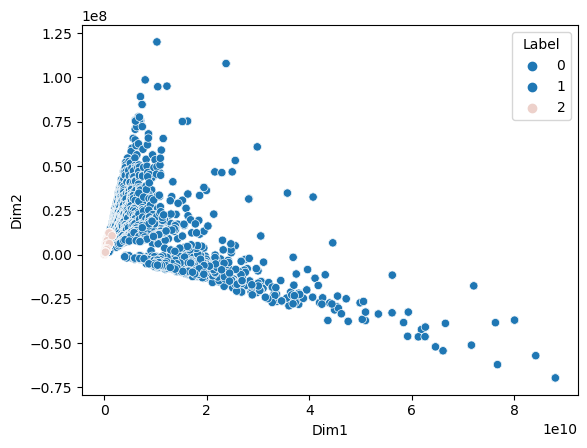

In [105]:
color=['r', 'g', 'b']
sns.color_palette("tab10")
for i in range(3):
    df_svd = pd.DataFrame({
        "Dim1":x_svd[10038*i:10038*(i+1),0],
        "Dim2":x_svd[10038*i:10038*(i+1),1],
        "Label": y_values[10038*i:10038*(i+1)]
    })# 重建DataFrame
    ax = sns.scatterplot(x="Dim1", y="Dim2", hue="Label",
                      data=df_svd, color=color[i])# 繪圖